# Distances and nearest neighbors

## Lecture objectives

1. Introduce distance and nearest neighbor calculations

A common task is getting the distances between a geometry and a set of other geometries, or the nearest neighbor. For example, you might want to get the closest school or grocery store to a particular census tract.

First, let's load in the same dataset we used in the previous lectures.

In [2]:
import geopandas as gpd
import pandas as pd

pantryDf = pd.read_csv('../data/Food_Resources_in_California.csv')
pantryDf = pantryDf[pantryDf.County=='Los Angeles']

# convert to a GeoDataFrame
pantrygdf = gpd.GeoDataFrame(
    pantryDf, geometry=gpd.points_from_xy(pantryDf.Longitude, pantryDf.Latitude, 
                                          crs='EPSG:4326'))

# get the census data for the City of LA
# B19019_001E is median household income
from cenpy import products
incomeDf = products.ACS(2017).from_county('Los Angeles, CA', level='tract',
                                        variables='B19019_001E')
incomeDf.rename(columns={'B19019_001E':'median_HH_income'}, inplace=True)

/Users/chaithra/opt/anaconda3/envs/uds/lib/python3.10/site-packages/cenpy/products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)


For distances, the projection is important here so let's convert to State Plane. 

In [3]:
pantrygdf.to_crs('EPSG:3497', inplace=True)
incomeDf.to_crs('EPSG:3497', inplace=True)

The nearest neighbor can be found with `sjoin_nearest`. The optional argument, `distance_col`, will add a column with the distances.

In [4]:
incomeDf.sjoin_nearest(pantrygdf, distance_col='dist_to_pantry')

,GEOID,geometry,median_HH_income,NAME,state,county,tract,index_right,Name,Street Address,...,Zip Code,County,Phone,Description,Resource Type,Web Link,Notes,Latitude,Longitude,dist_to_pantry
0,06037670324,"POLYGON ((1961796.196 533047.052, 1961984.333 ...",207679.0,"Census Tract 6703.24, Los Angeles County, Cali...",06,037,670324,515,St Lawrence Martyr Catholic Church,1900 S. Prospect Ave.,...,90277,Los Angeles,(310) 540-0329,The church provides emergency food for people ...,Food Pantry,https://www.211la.org/211search/more?site_id=1...,NaN,33.818004,-118.376422,1534.729574
99,06037650702,"POLYGON ((1965273.768 537656.816, 1965278.114 ...",121891.0,"Census Tract 6507.02, Los Angeles County, Cali...",06,037,650702,515,St Lawrence Martyr Catholic Church,1900 S. Prospect Ave.,...,90277,Los Angeles,(310) 540-0329,The church provides emergency food for people ...,Food Pantry,https://www.211la.org/211search/more?site_id=1...,NaN,33.818004,-118.376422,1112.503725
100,06037651201,"POLYGON ((1965328.554 535864.168, 1965334.156 ...",137159.0,"Census Tract 6512.01, Los Angeles County, Cali...",06,037,651201,515,St Lawrence Martyr Catholic Church,1900 S. Prospect Ave.,...,90277,Los Angeles,(310) 540-0329,The church provides emergency food for people ...,Food Pantry,https://www.211la.org/211search/more?site_id=1...,NaN,33.818004,-118.376422,184.698342
107,06037651222,"POLYGON ((1965791.753 534835.944, 1965805.401 ...",82849.0,"Census Tract 6512.22, Los Angeles County, Cali...",06,037,651222,515,St Lawrence Martyr Catholic Church,1900 S. Prospect Ave.,...,90277,Los Angeles,(310) 540-0329,The church provides emergency food for people ...,Food Pantry,https://www.211la.org/211search/more?site_id=1...,NaN,33.818004,-118.376422,815.166003
111,06037650701,"POLYGON ((1966457.520 537437.277, 1966458.699 ...",109125.0,"Census Tract 6507.01, Los Angeles County, Cali...",06,037,650701,515,St Lawrence Martyr Catholic Church,1900 S. Prospect Ave.,...,90277,Los Angeles,(310) 540-0329,The church provides emergency food for people ...,Food Pantry,https://www.211la.org/211search/more?site_id=1...,NaN,33.818004,-118.376422,1787.537971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,06037296600,"POLYGON ((1972498.405 526227.030, 1972499.077 ...",33116.0,"Census Tract 2966, Los Angeles County, California",06,037,296600,440,"Los Angeles County Workforce Development, Agin...",769 W. Third St.,...,90731,Los Angeles,(310) 519-6094,"The center provides adult education, emergency...",Food Pantry,https://www.211la.org/211search/more?site_id=1...,NaN,33.741390,-118.293860,0.000000
1611,06037211802,"POLYGON ((1971465.979 562753.663, 1971581.465 ...",36795.0,"Census Tract 2118.02, Los Angeles County, Cali...",06,037,211802,426,Karsh Family Social Service Center,3750 W. 6th St.,...,90020,Los Angeles,(213) 401-4651,"The center provides dental services, education...",Food Pantry,https://www.211la.org/211search/more?site_id=1...,NaN,34.063400,-118.304340,0.000000
1612,06037211803,"POLYGON ((1971927.522 562958.236, 1971928.128 ...",45192.0,"Census Tract 2118.03, Los Angeles County, Cali...",06,037,211803,426,Karsh Family Social Service Center,3750 W. 6th St.,...,90020,Los Angeles,(213) 401-4651,"The center provides dental services, education...",Food Pantry,https://www.211la.org/211search/more?site_id=1...,NaN,34.063400,-118.304340,218.472357
1928,06037209520,"POLYGON ((1974162.672 561235.875, 1974261.235 ...",28077.0,"Census Tract 2095.20, Los Angeles County, Cali...",06,037,209520,463,Pico Union Project,1153 Valencia St.,...,90015,Los Angeles,213-915-0084,Non-profit organization giving away free bags ...,Emergency Food Distribution,http://picounionproject.org/,NaN,34.045820,-118.274060,228.114344


Note that we only have the result for the closest part of the census tract. If we want the centroid, we can create a new GeoDataFrame and convert its polygons to centroids.

<Axes: >

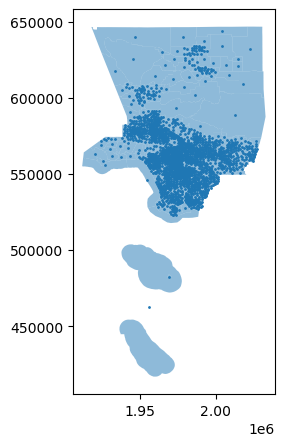

In [5]:
import matplotlib.pyplot as plt

incomeDf_centroids = incomeDf.copy()
incomeDf_centroids.geometry = incomeDf.geometry.centroid

# map to show the centroids 
fig, ax=plt.subplots(figsize=(5,5))
incomeDf_centroids.plot(markersize=1, ax=ax)
incomeDf.plot(ax=ax, lw=4, alpha=0.5)

And let's do the nearest neighbor with these centroids.

In [6]:
incomeDf_centroids.sjoin_nearest(pantrygdf, distance_col='dist_to_pantry')

,GEOID,geometry,median_HH_income,NAME,state,county,tract,index_right,Name,Street Address,...,Zip Code,County,Phone,Description,Resource Type,Web Link,Notes,Latitude,Longitude,dist_to_pantry
0,06037670324,POINT (1964491.680 533229.305),207679.0,"Census Tract 6703.24, Los Angeles County, Cali...",06,037,670324,515,St Lawrence Martyr Catholic Church,1900 S. Prospect Ave.,...,90277,Los Angeles,(310) 540-0329,The church provides emergency food for people ...,Food Pantry,https://www.211la.org/211search/more?site_id=1...,NaN,33.818004,-118.376422,2211.229594
99,06037650702,POINT (1965972.721 536914.814),121891.0,"Census Tract 6507.02, Los Angeles County, Cali...",06,037,650702,515,St Lawrence Martyr Catholic Church,1900 S. Prospect Ave.,...,90277,Los Angeles,(310) 540-0329,The church provides emergency food for people ...,Food Pantry,https://www.211la.org/211search/more?site_id=1...,NaN,33.818004,-118.376422,1776.805019
100,06037651201,POINT (1965973.321 535669.506),137159.0,"Census Tract 6512.01, Los Angeles County, Cali...",06,037,651201,515,St Lawrence Martyr Catholic Church,1900 S. Prospect Ave.,...,90277,Los Angeles,(310) 540-0329,The church provides emergency food for people ...,Food Pantry,https://www.211la.org/211search/more?site_id=1...,NaN,33.818004,-118.376422,887.884197
107,06037651222,POINT (1966851.764 534740.129),82849.0,"Census Tract 6512.22, Los Angeles County, Cali...",06,037,651222,515,St Lawrence Martyr Catholic Church,1900 S. Prospect Ave.,...,90277,Los Angeles,(310) 540-0329,The church provides emergency food for people ...,Food Pantry,https://www.211la.org/211search/more?site_id=1...,NaN,33.818004,-118.376422,1805.993294
111,06037650701,POINT (1967323.680 536861.232),109125.0,"Census Tract 6507.01, Los Angeles County, Cali...",06,037,650701,515,St Lawrence Martyr Catholic Church,1900 S. Prospect Ave.,...,90277,Los Angeles,(310) 540-0329,The church provides emergency food for people ...,Food Pantry,https://www.211la.org/211search/more?site_id=1...,NaN,33.818004,-118.376422,2653.890110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,06037211802,POINT (1971869.211 562553.592),36795.0,"Census Tract 2118.02, Los Angeles County, Cali...",06,037,211802,426,Karsh Family Social Service Center,3750 W. 6th St.,...,90020,Los Angeles,(213) 401-4651,"The center provides dental services, education...",Food Pantry,https://www.211la.org/211search/more?site_id=1...,NaN,34.063400,-118.304340,38.706663
1612,06037211803,POINT (1972100.584 562957.820),45192.0,"Census Tract 2118.03, Los Angeles County, Cali...",06,037,211803,426,Karsh Family Social Service Center,3750 W. 6th St.,...,90020,Los Angeles,(213) 401-4651,"The center provides dental services, education...",Food Pantry,https://www.211la.org/211search/more?site_id=1...,NaN,34.063400,-118.304340,463.036586
1928,06037209520,POINT (1974429.296 561105.787),28077.0,"Census Tract 2095.20, Los Angeles County, Cali...",06,037,209520,463,Pico Union Project,1153 Valencia St.,...,90015,Los Angeles,213-915-0084,Non-profit organization giving away free bags ...,Emergency Food Distribution,http://picounionproject.org/,NaN,34.045820,-118.274060,588.826424
2220,06037210010,POINT (1974856.640 560694.016),25755.0,"Census Tract 2100.10, Los Angeles County, Cali...",06,037,210010,463,Pico Union Project,1153 Valencia St.,...,90015,Los Angeles,213-915-0084,Non-profit organization giving away free bags ...,Emergency Food Distribution,http://picounionproject.org/,NaN,34.045820,-118.274060,197.925162


Notice that the distances are a little larger than before.

In [7]:
incomeDf.sjoin_nearest(pantrygdf, 
        distance_col='dist_to_pantry').dist_to_pantry.mean()

1837.8742257115623

In [8]:
incomeDf_centroids.sjoin_nearest(pantrygdf, 
        distance_col='dist_to_pantry').dist_to_pantry.mean()

2732.318386557567

What if you don't just care about the closest one, but want to get the distances from a census tract to a larger number of pantries, or even all of them? For example, some accessibility measures look at the distance to the 2nd or 3rd closest destination (e.g. a grocery store), in order to capture the number of choices that people have.

To start with, let's look at the distances to a single tract. Note that `sort_values` will sort the results, so it's easiest to see the smallest and largest distances.

In [9]:
# as an example, take the first census tract, and get its geometry
tractgeom = incomeDf.iloc[0].geometry

# get the distances from this tract to all the food pantries
distances = pantrygdf.distance(tractgeom)
distances.sort_values(inplace=True)
distances

515      1534.729574
517      3329.762323
534      3952.649020
453      4167.782181
479      5596.180343
           ...      
458     70529.757842
495     96842.441951
339     99851.762006
343    100859.925087
399    101813.856761
Length: 211, dtype: float64

So how do we know which one is the 3rd closest? We can use `iloc` to get the 3rd row. 

In [10]:
distances.iloc[2]

3952.649020300476

If we want to calculate the distance to the 3rd closest pantry for each census tract, we can put this in a function.

The argument of the function will be the geometry of the tract. It will return the distance.

Once we have that function, we can use our old friend `apply` to apply it to every tract in the city of LA.

In [11]:
def get_3rd_closest_dist(geom):
    # get distance from every pantry to a single census tract (geom)
    distances = pantrygdf.distance(geom)
    third_closest = distances.sort_values().iloc[2]
    return third_closest

incomeDf['dist_third_closest'] = incomeDf.geometry.apply(get_3rd_closest_dist)

In [12]:
incomeDf

,GEOID,geometry,median_HH_income,NAME,state,county,tract,dist_third_closest
0,06037670324,"POLYGON ((1961796.196 533047.052, 1961984.333 ...",207679.0,"Census Tract 6703.24, Los Angeles County, Cali...",06,037,670324,3952.649020
1,06037670500,"POLYGON ((1966092.299 529162.523, 1966102.523 ...",206932.0,"Census Tract 6705, Los Angeles County, California",06,037,670500,3091.257267
2,06037651101,"POLYGON ((1967495.714 534170.049, 1967497.194 ...",93160.0,"Census Tract 6511.01, Los Angeles County, Cali...",06,037,651101,1732.145780
3,06037297400,"POLYGON ((1968954.784 524080.852, 1969128.201 ...",91164.0,"Census Tract 2974, Los Angeles County, California",06,037,297400,2191.013342
4,06037670100,"POLYGON ((1969557.970 531960.534, 1969559.108 ...",58340.0,"Census Tract 6701, Los Angeles County, California",06,037,670100,1596.893581
...,...,...,...,...,...,...,...,...
2341,06037400304,"POLYGON ((2017679.864 566109.001, 2017681.594 ...",71480.0,"Census Tract 4003.04, Los Angeles County, Cali...",06,037,400304,4150.305802
2342,06037402405,"POLYGON ((2018200.542 562890.137, 2018244.526 ...",63810.0,"Census Tract 4024.05, Los Angeles County, Cali...",06,037,402405,4393.510331
2343,06037400302,"POLYGON ((2019001.025 567420.616, 2019000.974 ...",70893.0,"Census Tract 4003.02, Los Angeles County, Cali...",06,037,400302,4155.631984
2344,06037401704,"POLYGON ((2023197.203 567138.879, 2023197.533 ...",51406.0,"Census Tract 4017.04, Los Angeles County, Cali...",06,037,401704,3438.800426


Finally, let's plot using the `seaborn.regplot()` function that we saw before.

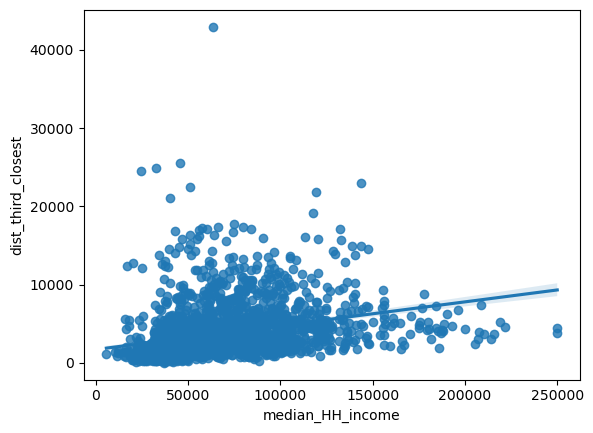

In [13]:
import seaborn as sns
ax = sns.regplot(x="median_HH_income", y="dist_third_closest", data=incomeDf)

<div class="alert alert-block alert-info">
<h3>Key Takeaways</h3>
<ul>
  <li>Nearest neighbors, and distances are simple to calculate in geopandas.</li>
  <li>Watch your projection!</li>
</ul>
</div>